# Análisis Exploratorio 
## House Prices: Advanced Regression Techniques

## Inciso 1 - Carga del dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Cargar los datos
df = pd.read_csv("dataset/train.csv")

# Revisar dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

# Obtener información del dataset
df.info()



Dimensiones del dataset: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1

## Inciso 2 - Analisis Exploratorio

In [5]:
# Obtener estadísticas descriptivas
print(df.describe())

# Revisar datos nulos
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores nulos en cada columna:")
print(missing_values)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

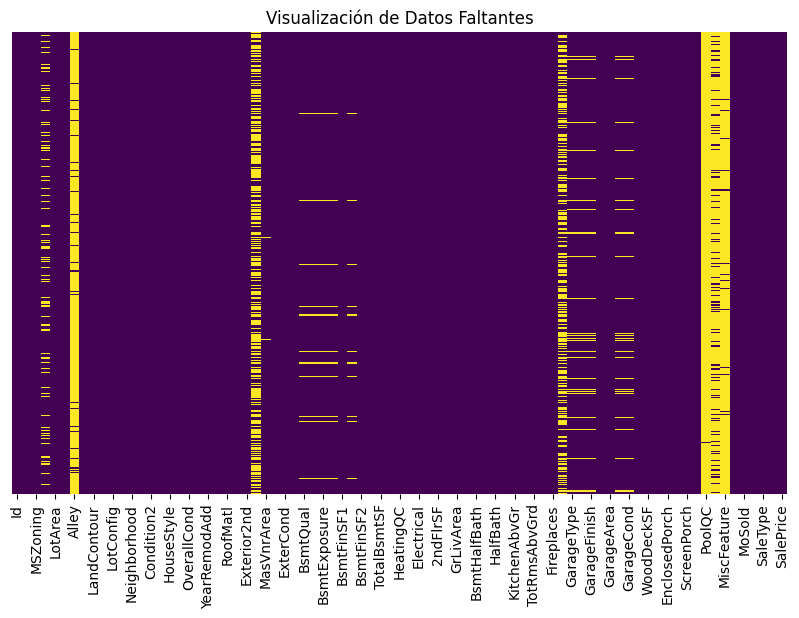

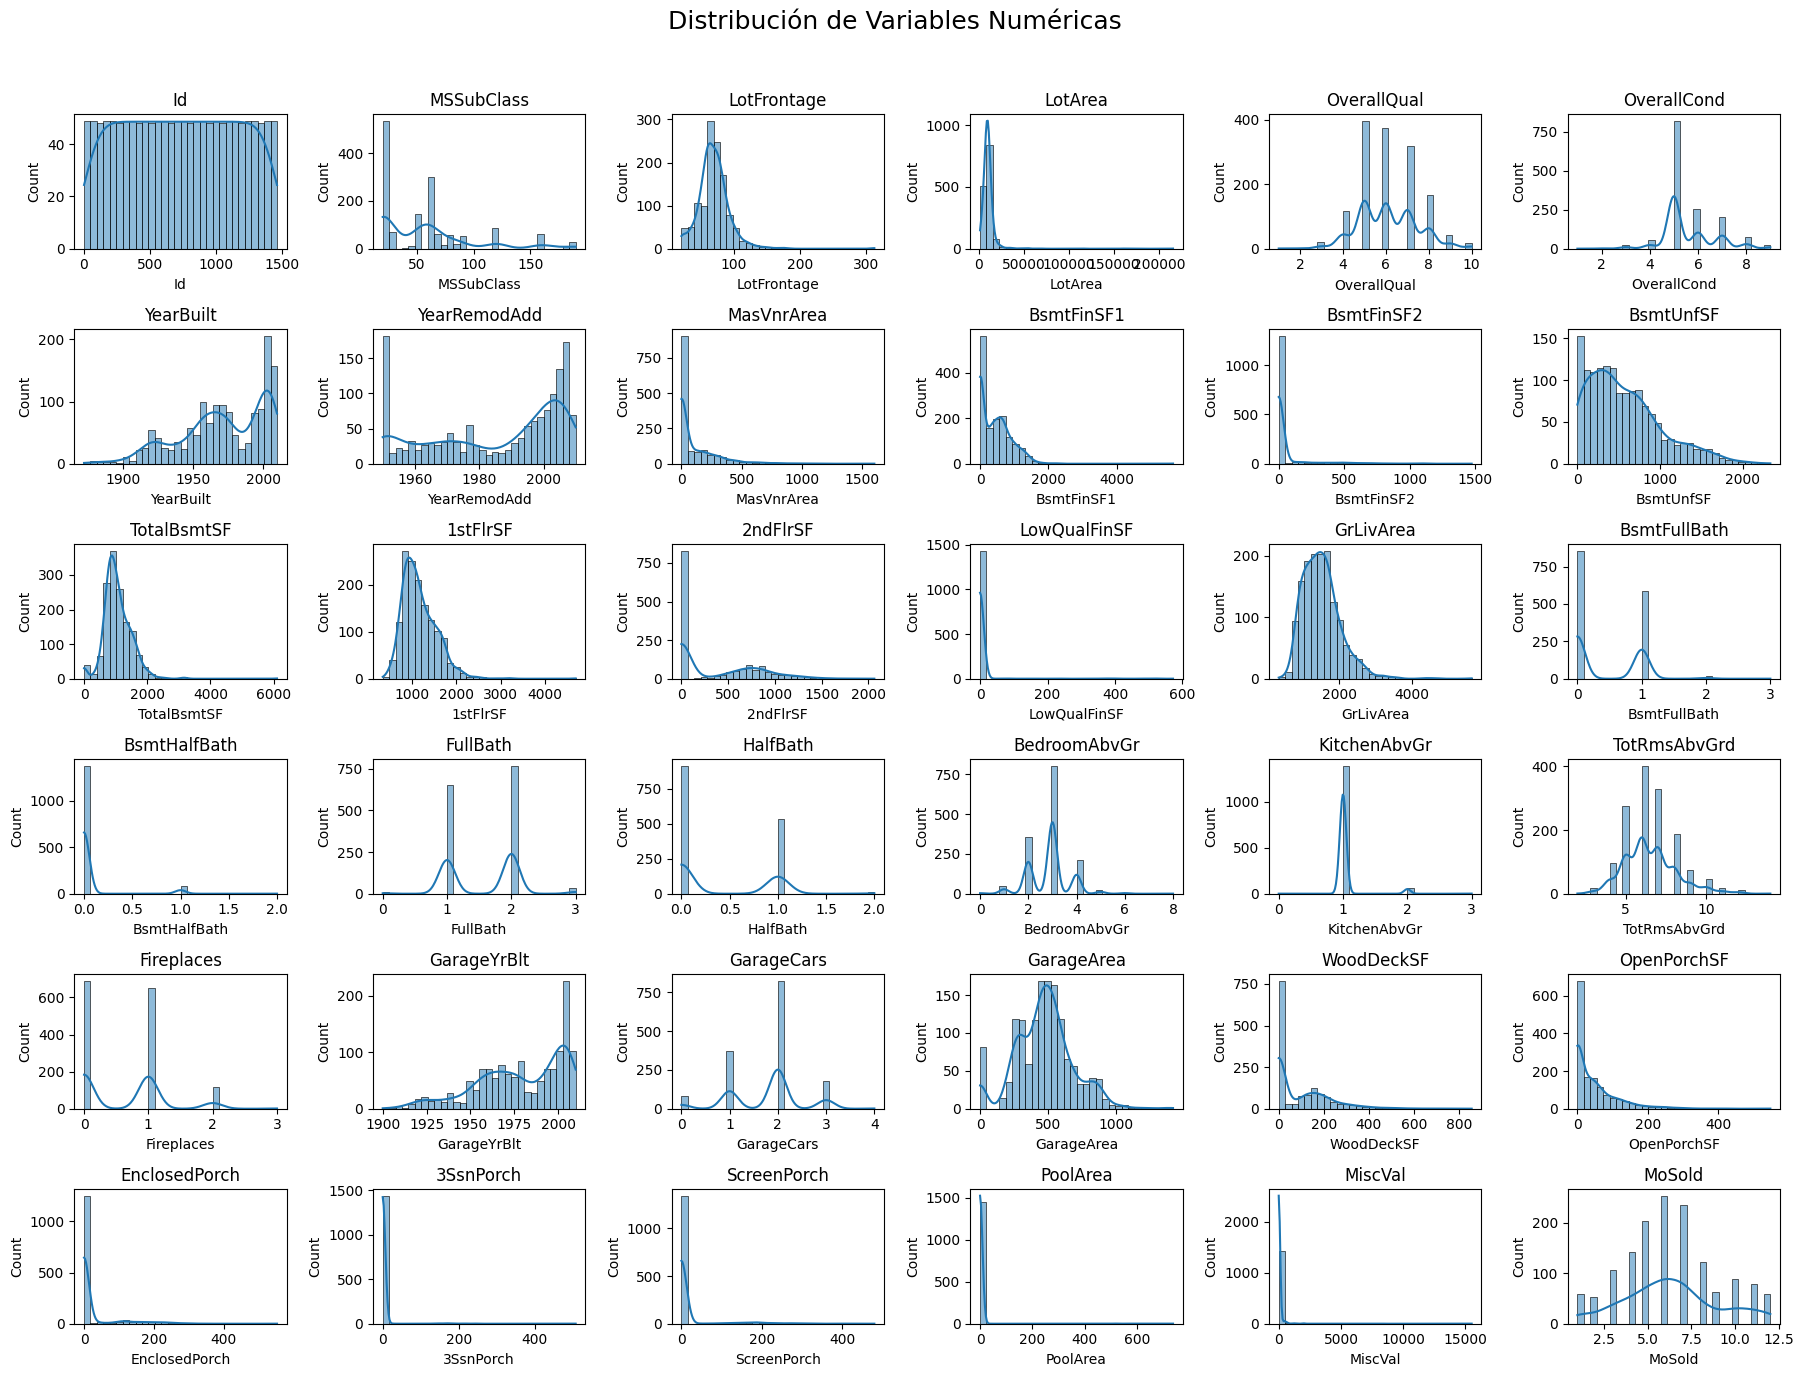

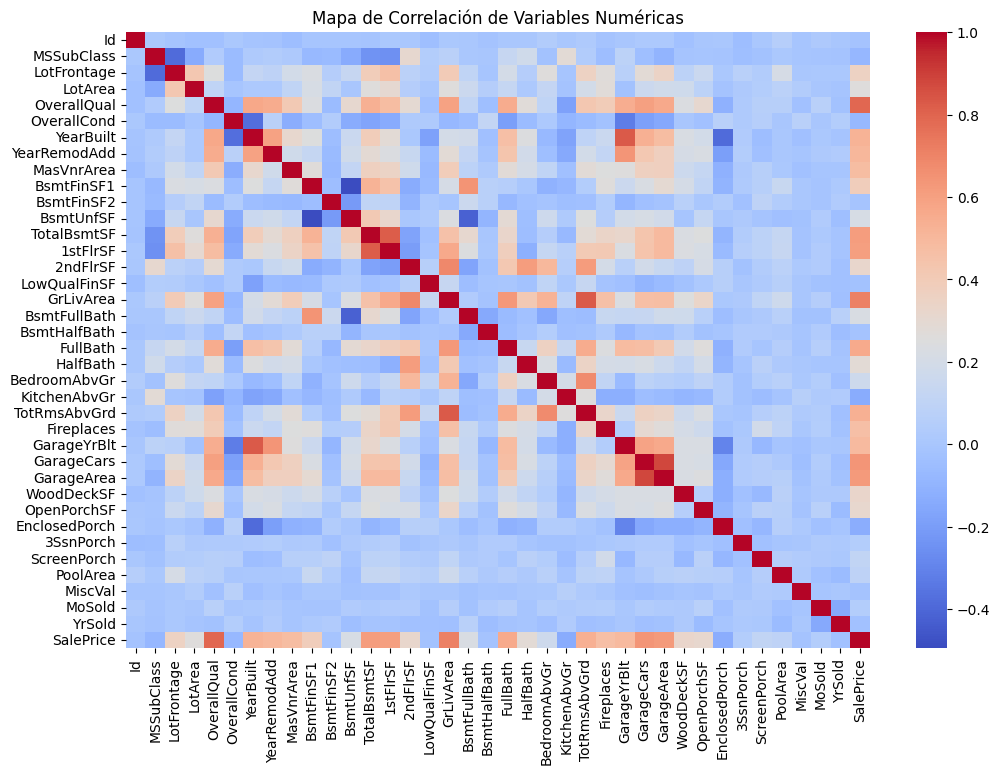

Top Variables Correlacionadas con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [6]:


# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualización de Datos Faltantes")
plt.show()

# Gráficos de histogramas de variables numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Definir tamaño de la figura y número de bins
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 14))  # Ajusta filas y columnas según la cantidad de variables
fig.suptitle("Distribución de Variables Numéricas", fontsize=18)

# Aplanar la matriz de ejes para iterar más fácilmente
axes = axes.flatten()

# Generar histogramas para cada variable
for i, col in enumerate(df_numeric.columns):
    if i < len(axes):  # Evita errores si hay más gráficos que subplots
        sns.histplot(df_numeric[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(col, fontsize=12)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout(rect=[0, 0, 1, 0.96])  # rect ajusta el título principal
plt.show()


# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=False, cmap="coolwarm")
plt.title("Mapa de Correlación de Variables Numéricas")
plt.show()

# Selección de las variables más correlacionadas con SalePrice
correlation_matrix = df_numeric.corr()
top_corr_features = correlation_matrix["SalePrice"].sort_values(ascending=False).head(10)
print("Top Variables Correlacionadas con SalePrice:")
print(top_corr_features)

## Inciso 3 - Clusters


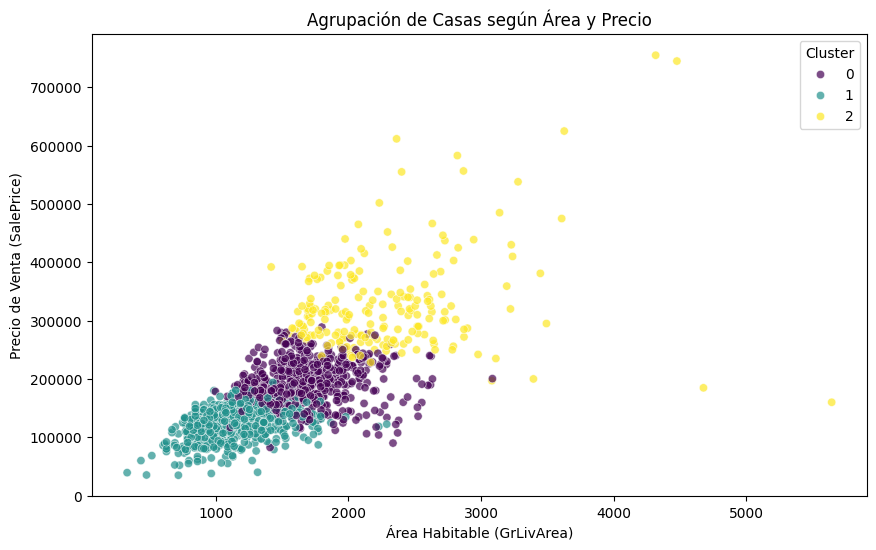

Resumen de los Grupos:
         OverallQual    GrLivArea      SalePrice
Cluster                                         
0           6.597424  1662.091787  191210.602254
1           4.957614  1126.579278  124107.083203
2           8.168317  2291.024752  328450.247525


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv("dataset/train.csv")

# Selección de variables relevantes para el análisis de grupos
features = ["OverallQual", "GrLivArea", "SalePrice"]
df_cluster = df[features].dropna()

# Estandarización de las variables para clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Aplicación de K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualización de los grupos
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cluster["GrLivArea"], y=df_cluster["SalePrice"], hue=df_cluster["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Área Habitable (GrLivArea)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.title("Agrupación de Casas según Área y Precio")
plt.legend(title="Cluster")
plt.show()

# Descripción de cada grupo
group_summary = df_cluster.groupby("Cluster")[features].mean()
print("Resumen de los Grupos:")
print(group_summary)


## Inciso 4 - Ingeniería de Variables


Variables con mayor impacto en SalePrice:
OverallQual    0.609364
GrLivArea      0.474356
YearBuilt      0.404873
TotalBsmtSF    0.395649
GarageCars     0.350811
GarageArea     0.315238
1stFlrSF       0.312615
GarageYrBlt    0.308114
FullBath       0.278872
MSSubClass     0.277176
dtype: float64


C:\Users\usuario\AppData\Local\Temp\ipykernel_5112\1733558026.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores.head(10), y=mi_scores.head(10).index, palette="viridis")


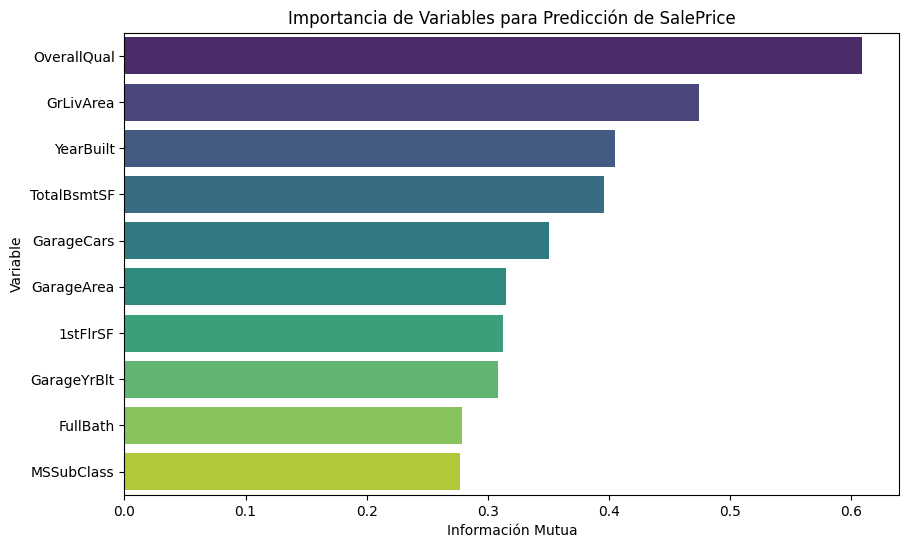

In [10]:

# Ingeniería de características
# Selección de variables predictoras más relevantes
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("SalePrice")  # Removemos la variable objetivo

# Calcular información mutua entre las variables y el precio de venta
X = df[num_features].dropna()
y = df.loc[X.index, "SalePrice"]
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=num_features).sort_values(ascending=False)

# Mostrar las variables más relevantes
print("Variables con mayor impacto en SalePrice:")
print(mi_scores.head(10))

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores.head(10), y=mi_scores.head(10).index, palette="viridis")
plt.xlabel("Información Mutua")
plt.ylabel("Variable")
plt.title("Importancia de Variables para Predicción de SalePrice")
plt.show()


## Inciso 6

In [12]:
from sklearn.model_selection import train_test_split
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (896, 37)
Tamaño del conjunto de prueba: (225, 37)
